In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv

In [15]:
# Load data from netlogo's behaviorspace "spreadsheet" output
def loadBehaviorspace(filename):
    lines = []
    with open(filename, 'rb') as csvfile:
         reader = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in reader:
             lines.append(row)

    metadata = lines[0:5]
    
    _data = lines[6:]
    _data = np.array(lines[6:], dtype=object).T
    for i in range(1, len(_data)):
        for j in range(1, len(_data[i])):
            try:
                _data[i][j] = float(_data[i][j])
            except:
                continue
    data = {}
    for col in _data:
        data[col[0]] = np.array(col[1:], dtype=float)
            
    return (metadata, data)

In [50]:
#metadata,data = loadBehaviorspace("./behaviorspace_data/vary_tau_p_adaptive-1_favorstable.csv")
#metadata,data = loadBehaviorspace("./behaviorspace_data/vary_tau_p_turn-taker_favorstable.csv")
metadata,data = loadBehaviorspace("./behaviorspace_data/vary_tau_p_favorstable_adaptive-2_1_1_0.5.csv")

## Final total wealth, across p

#### P is the probability that an agent will be FavorStable instead of Random:

`p = 0.0` | 100% of the population is Random

`p = 0.5` | Equal mix of FavorStable and Random

`p = 1.0` | 100% of the population is FavorStable


intercept = 7442.0
slope =     -1367.0


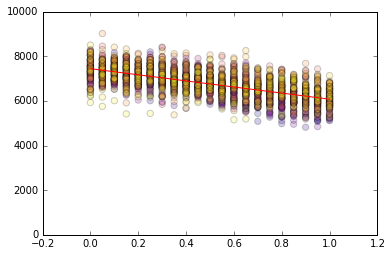

p = 6.046831198195642e-259
r = -0.644
stderr = 34.6


In [53]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_p = np.extract(final_step_mask, data['p'])
final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(final_tau, final_total_wealth)

print ""
print "intercept =", round(intercept)
print "slope =    ", round(slope)

plt.plot(final_tau, intercept + slope*final_tau, 'r', label='fitted line')
plt.scatter(final_tau, final_total_wealth, c=plt.cm.plasma(plt.Normalize()(final_p)), alpha=0.2, s=40)
plt.ylim(0, 10000)
plt.show()

print "p =", p_value
print "r =", round(r_value, 3)
print "stderr =",round(std_err, 1)

## Final wealth distribution, across tau
Per agent type

Blue (strategy 0) is FavorStable

Blue (strategy 1) is Random

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


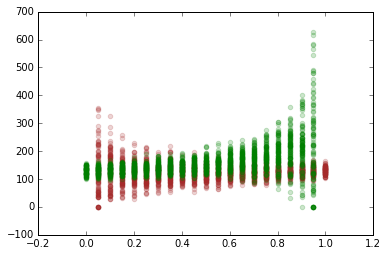

In [54]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['p'])
final_wealth_0 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 0 ]']/(data['p']*50))
final_wealth_1 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 1 ]']/((1-data['p'])*50))

plt.scatter(final_tau, final_wealth_0, color='brown', alpha=0.2)
plt.scatter(final_tau, final_wealth_1, color='green', alpha=0.2)
#plt.scatter(final_tau, final_wealth_2, color='green')
#plt.scatter(final_tau, final_wealth_3, color='blue')
plt.show()

In [259]:
def break_by_agent_group():
    final_step_mask = [step == 100 for step in data['[step]']]
    final_tau = data['tau'] * final_step_mask
    final_wealth_0 = data['sum [wealth] of turtles with [ who mod nn = 0 ]'] * final_step_mask
    final_wealth_1 = data['sum [wealth] of turtles with [ who mod nn = 1 ]'] * final_step_mask
    final_wealth_2 = data['sum [wealth] of turtles with [ who mod nn = 2 ]'] * final_step_mask
    final_wealth_3 = data['sum [wealth] of turtles with [ who mod nn = 3 ]'] * final_step_mask

    plt.scatter(final_tau, final_wealth_0, color='blue')
    plt.scatter(final_tau, final_wealth_1, color='red')
    plt.scatter(final_tau, final_wealth_2, color='green')
    plt.scatter(final_tau, final_wealth_3, color='blue')
    plt.show()

In [232]:
np.extract(
    [True, False, True],
    [1,2,3]
)

array([1, 3])